# Filtragem de imagens e contornos com OpenCV

**Atenção**: Rode este notebook com `jupyter notebook` e não `jupyter lab`. A parte interativa requer que seja específico

Tópicos:
- [Filtragem linear](#filtragem)
- [Deteção de borda](#borda)
- [Detector de linhas de Canny](#canny)
- [Transformada de Hough](#hough)

Bibliografia: 

[Cap.5 - Computer Vision. Shapiro](https://courses.cs.washington.edu/courses/cse576/book/ch5.pdf)

[Cap.3 - Digital Image Processing. Gonzales / Woods](http://web.ipac.caltech.edu/staff/fmasci/home/astro_refs/Digital_Image_Processing_2ndEd.pdf)

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import sys
import math
print ("OpenCV Version : %s " % cv2.__version__)

from ipywidgets import widgets, interact, interactive, FloatSlider, IntSlider

import auxiliar as aux

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(aux) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(aux)



OpenCV Version : 4.5.1 
Este script não deve ser executado diretamente
Este script não deve ser executado diretamente


# Filtragem linear

Na filtragem linear, uma pequena matriz chamada de `kernel` é convoluída com a imagem. *Veja na lousa a explicação do professor*

In [2]:
img = cv2.imread("hall_box_battery1.jpg",cv2.IMREAD_GRAYSCALE )

In [3]:
small = cv2.resize(img, (768, 384), 0,0)

In [4]:
plt.rcParams["figure.figsize"] = (10,5)


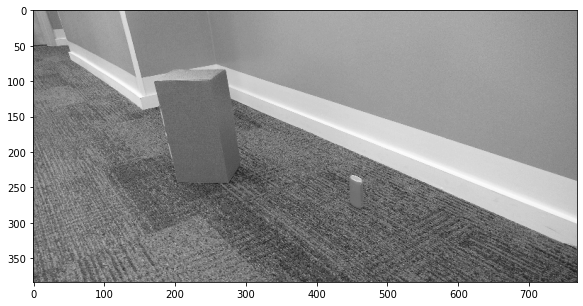

In [5]:
plt.imshow(small, cmap="Greys_r")

In [6]:
from ipywidgets import interact, FloatSlider

In [7]:
blur = small
    
def plot_blur(sz):
    global blur
    plt.rcParams["figure.figsize"] = (10,5)
    blur = cv2.blur(small, (sz,sz))
    plt.imshow(blur, cmap="Greys_r")
    

In [8]:
interact(plot_blur, sz=IntSlider(min=1, max=15, step=1, value=3))

interactive(children=(IntSlider(value=3, description='sz', max=15, min=1), Output()), _dom_classes=('widget-in…

<function __main__.plot_blur(sz)>

<div id="borda"></div>

## Deteção de borda subsequente

In [9]:
out3 = small

def plot_filter(widgets, data):
    kernel = aux.make_np_from_widgets_list(widgets)
    global out3
    out3 = cv2.filter2D(data, -1,  kernel)
    plt.imshow(out3, cmap="Greys_r")
    
    

In [10]:
list_kernel, widgets_kernel = aux.make_widgets_mat(3,3)

In [11]:
widgets_kernel

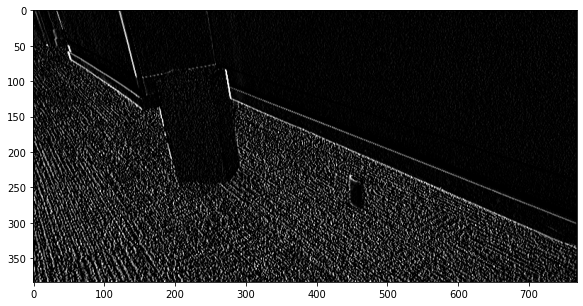

In [29]:
plot_filter(list_kernel, blur)

Veja mais alguns kernels de processamento de imagem [no link](http://setosa.io/ev/image-kernels/)

# Realce de bordas

$$
\begin{pmatrix} -1 & -1 & -1 \\
-1 & 9 & -1 \\
-1 & -1 & -1 
\end{pmatrix}
$$

# Filtro de Sobel

$\frac{\partial I}{\partial x} \approx I * \begin{pmatrix} -1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1 
\end{pmatrix} \;\;\;\;\;\;\;$
$\frac{\partial I}{\partial x} \approx I * \begin{pmatrix} -1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1 
\end{pmatrix}$

$|\overrightarrow{\rm \nabla I}| = \sqrt{ \frac{\partial I}{\partial x}^2 + \frac{\partial I}{\partial x}^2} \;\;\;\;\;\;\;$
$\angle \nabla I = atan \left( \frac {\frac{\partial I}{\partial y}} {\frac{\partial I}{\partial x}}\right)$



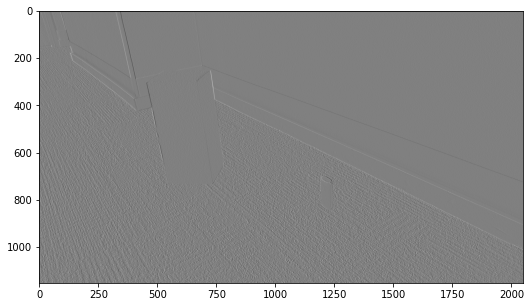

In [13]:
Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0)
plt.imshow(Ix, cmap='gray')

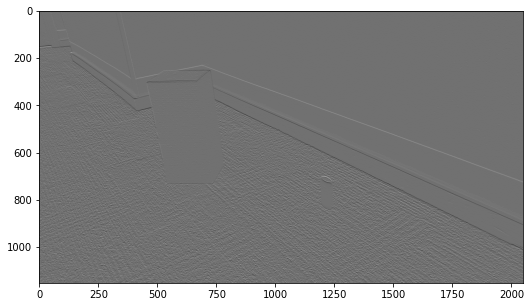

In [14]:
Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1)
plt.imshow(Iy, cmap='gray')

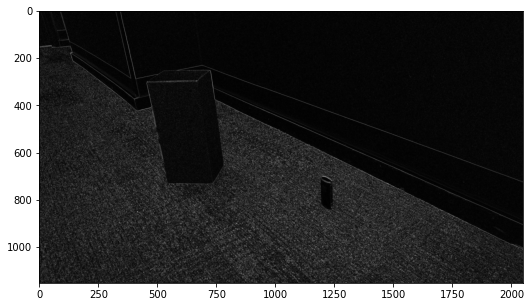

In [15]:
grad = (Ix**2 + Iy**2)**0.5
plt.imshow(grad, cmap='gray')

<div id="canny"></div>

# Detector de linhas de Canny

O detector de linhas de *Canny* combina algumas operações lineares de forma mais sofisticada.
Além disso, os contornos sofrem um processo de emagrecimento

In [16]:
min_contrast = 100
max_contrast = 200
linhas = cv2.Canny(small, min_contrast, max_contrast )

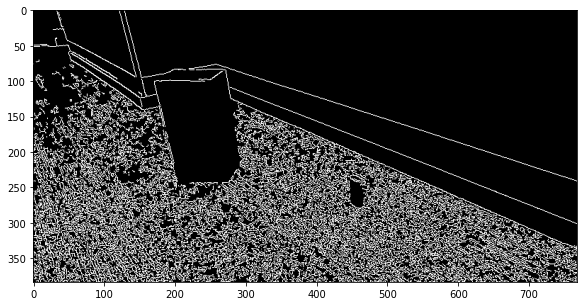

In [17]:
plt.imshow(linhas, cmap="Greys_r")

In [18]:
canny_img = None

def canny(minimo, maximo):
    img = cv2.Canny(small, minimo, maximo)
    plt.imshow(img, cmap="Greys_r")
    global canny_img
    canny_img = img

In [19]:
w = interactive(canny, minimo=10, maximo=40)

In [20]:
w

interactive(children=(IntSlider(value=10, description='minimo', max=30, min=-10), IntSlider(value=40, descript…

<div id="inrange"></div>

# Transformada de Hough

A [transformada de Hough](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html) encontra todas as possíveis linhas que estão presentes na imagem

In [21]:
hough_img = canny_img.copy() # Vamos reusar a imagem de canny


lines = cv2.HoughLinesP(hough_img, 10, math.pi/180.0, 100, np.array([]), 45, 5)

a,b,c = lines.shape

hough_img_rgb = cv2.cvtColor(hough_img, cv2.COLOR_GRAY2BGR)

for i in range(a):
    # Faz uma linha ligando o ponto inicial ao ponto final, com a cor vermelha (BGR)
    cv2.line(hough_img_rgb, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 5, cv2.LINE_AA)

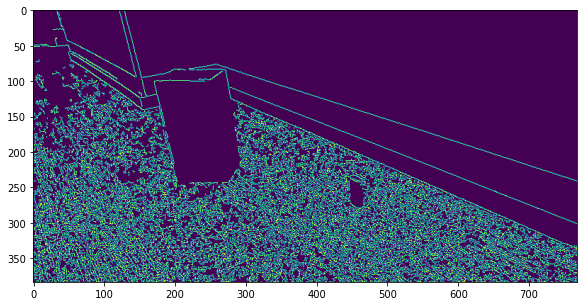

In [22]:
plt.imshow(linhas)

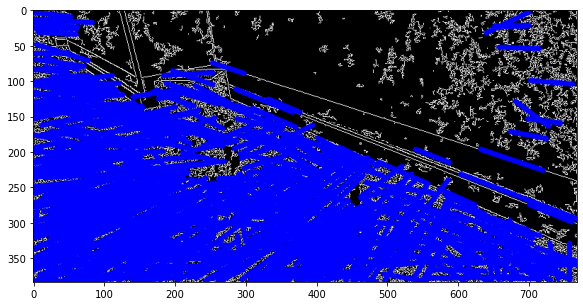

In [23]:
plt.imshow(hough_img_rgb)

# Hough Circles

Funciona de forma equivalente, mas acha círculos. Veja o demo `draw_circles_video.py`
